In [1]:
import ssm
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Conspecific_Tracking_ta_edit_117 as cs
from scipy import interpolate 
from beating import rotation,tail_spline,plot_tail
from hmmlearn import hmm

In [2]:
path = "/Users/miaoyuqi/研究/Statistical analyses of Siamese fighting fish aggressive behavior/DSI-Students/Yuqi_scripts/IM1_IM2Fish1_AN.h5"
f = pd.HDFStore(path,'r')
data_top = f.get('df_with_missing')
data_top.columns = data_top.columns.droplevel()
data_top1 = cs.auto_scoring_tracefilter(data_top)
data_top2 = data_top1[data_top1.isnull()["F_spine1"]["x"]== False].fillna(method = "ffill")

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


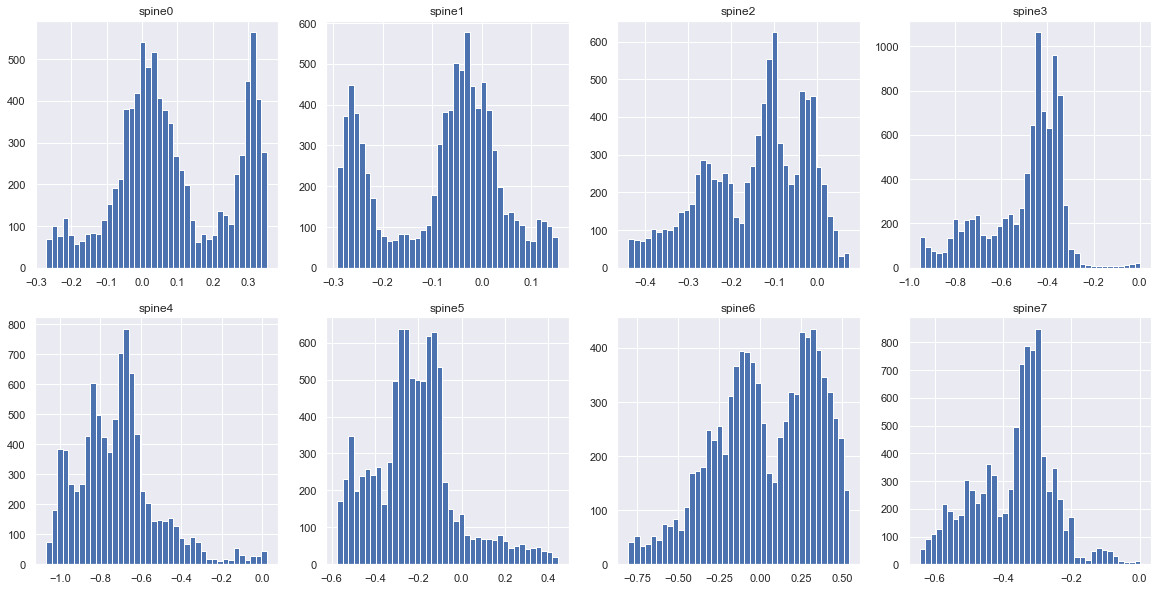

In [3]:
focus_region = range(50000,60000)
data = rotation(data_top2.iloc[focus_region,:])
beating = tail_spline(data)
#beating = np.array(beating)
#fig,ax = plt.subplots(2,4,figsize=(20, 10))
#for j in range(8):
#    xmin = np.quantile(beating[:,j],0.05)
#    xmax = np.quantile(beating[:,j],0.95)
#    ax[j//4,j%4].hist(beating[:,j], bins = 40, range = [xmin,xmax])
#    ax[j//4,j%4].set_title("spine"+str(j))
plot_tail(beating,focus_region)

In [4]:
focus_region = range(0,150000)
data = rotation(data_top2.iloc[focus_region,:])
beating = tail_spline(data)
beating_df = pd.DataFrame(beating).dropna()

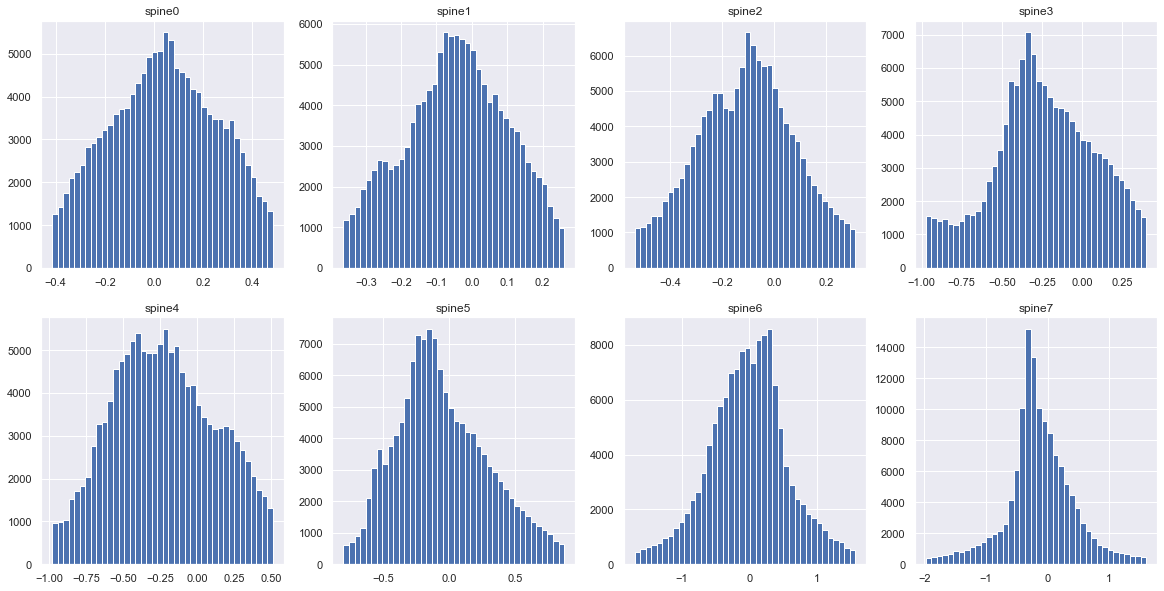

In [5]:
plot_tail(beating,focus_region)

## aggregate beating and fit pca


### PCA

In [9]:
x=beating_df.values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
pcs=pca.transform(x)

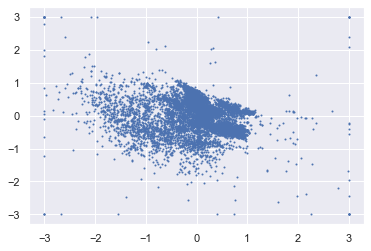

In [11]:
pcs=pcs[:,:2]
pcs = np.clip(pcs,-3,3)
plt.scatter(pcs[:,0],pcs[:,1],s = 1)

### kmeans

(-3, 3)

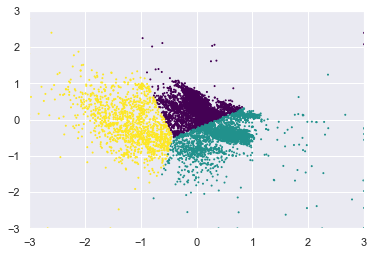

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(pcs)
y=kmeans.predict(pcs)
plt.scatter(pcs[:, 0], pcs[:, 1], c=y,s=1, cmap='viridis')
plt.xlim((-3,3))
plt.ylim((-3,3))

### HMM

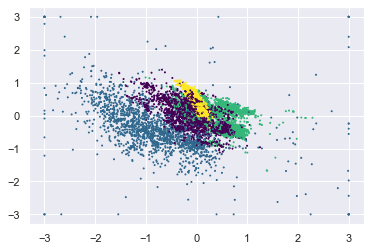

In [13]:
hmm_3=hmm.GaussianHMM(n_components=4, covariance_type="full", n_iter=100)
hmm_3.fit(pcs)
y=hmm_3.predict(pcs)
plt.scatter(pcs[:, 0], pcs[:, 1], c=y,s=1, cmap='viridis')